# Aufgabenblatt 5




## Nichtlineare Optimierung - 1


### Aufgabe 1.

Führen Sie für das Optimierungsproblem 

$$ (x-0.5)^2 + (2-x)^{-2} \to \text{min},  \quad 0 \leq x \leq 1 $$

sechs Iterationsschritte der Goldenen-Schnitt-Suche durch. 

In [2]:
import math
f = lambda x: (x-0.5)**2 + (2-x)**(-2)
fi = (math.sqrt(5) - 1)/2
og = 1; ug = 0

for x in range(6):
    la = ug + (1-fi)*(og-ug)
    mu = ug + fi*(og-ug)

    if(f(la) < f(mu)):
        og = mu
    else:
        ug = la
    #print (ug, og)
    
print("Untere und obere Grenzen:", ug, og)
print("Optimum:",(ug+og)/2)

Untere und obere Grenzen: 0.27050983124842276 0.326237921249264
Optimum: 0.2983738762488434


### Aufgabe 2.

Finden Sie das Minimum der Funktion

$$ f(x) =  3 x^3 - 5 x^2 + x + 2 $$

im Intervall $[ 0.5; 3 ]$ mit der Fibonacci - Suche  und Genauigkeit von $\epsilon = 0.1$                         

Hinweis: Wählen Sie den Parameter $n$ so, dass Sie mit dem kleinsten Wert von $n$ die notwendige Genauigkeit $\epsilon $ erreichen können. 


In [1]:
fib = [0,1,1,2,3,5,8,13,21,34,55,89,144]

f = lambda x: 3* (x**3) - 5* (x**2) + x + 2
ug = 0.5; og = 3
 
n = 9

for k in range(n):
    if n-k-2<0:
        break;
    la = ug + (og-ug)*(fib[n-k-2]/fib[n-k])
    mu = ug + (og-ug)*(fib[n-k-1]/fib[n-k])

    fla = f(la)
    fmu = f(mu)
    
    if(fla < fmu):
        og = mu
    elif(fla > fmu):
        ug = la
    else:
        break;
    print(k, ug, og)

print("Untere und obere Grenzen:", ug, og)
print("Optimum:",(ug+og)/2)

0 0.5 2.0441176470588234
1 0.5 1.4558823529411764
2 0.8676470588235294 1.4558823529411764
3 0.8676470588235294 1.2352941176470589
4 0.8676470588235294 1.0882352941176472
5 0.9411764705882354 1.0882352941176472
Untere und obere Grenzen: 0.9411764705882354 1.0882352941176472
Optimum: 1.0147058823529413


### Aufgabe 3.
Berechnen Sie mit vier Schritten des Newton-Raphson Verfahrens eine Annäherung zum Minimum der Funktion 

$$ f(x)= x^4 - 6 x^2 + 10$$

im Intervall $[ 1 ; 3 ]$ (Startwert = 2).

In [10]:
x0 = 2
f = lambda x: x**4 - 6*x**2 + 10;
f_pr = lambda x: 4*x**3 - 12*x;
f_prpr = lambda x: 12*x**2 - 12;

for x in range(4):
    xn = x0 - ((f_pr(x0))/(f_prpr(x0)))
    print("x_", x+1, xn)
    x0 = xn;


x_ 1 1.7777777777777777
x_ 2 1.7337566137566138
x_ 3 1.732053321730378
x_ 4 1.7320508075743515


### Aufgabe 4. 

Führen Sie vier Iterationsschritte mit dem “Steilster Abstieg“-Algorithmus für das Problem  


$$ - 2 x_1 x_2 - 2 x_2 + x_1^2 + 2 x_2^2 \to \text{min}$$ 

durch (Startvektor = Nullvektor). 

Zeichnen Sie eine Skizze der Zwischenlösungen und erraten Sie die optimale Lösung.

dx: 2*x - 2*y , dy: -2*x + 4*y - 2
0 0
0 -2
[0.24999999] [-0.5]


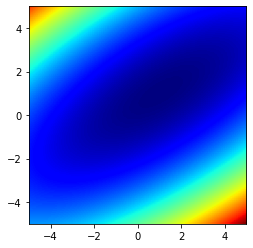

C:\Users\alexp\AppData\Local\Temp/ipykernel_6620/1595285534.py:66: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


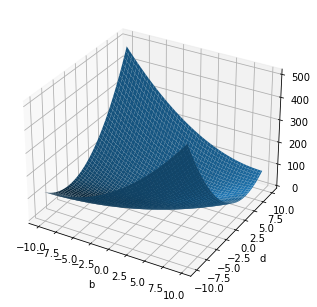

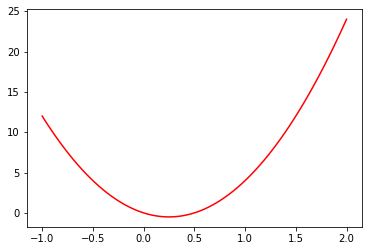

In [72]:
import sympy as sp
x, y = sp.symbols('x y')

f = lambda x, y: -2*x*y - 2*y + x**2 + 2*y**2

dx = sp.diff(f(x,y), x)
dy = sp.diff(f(x,y), y)
print("dx:", dx, ", dy:", dy)

xp = 0; yp = 0 #Startvektor waehlen
#https://stackoverflow.com/questions/51814567/python-how-to-get-the-value-of-one-specific-point-of-derivative
#https://docs.sympy.org/latest/modules/utilities/lambdify.html

ddx = sp.lambdify((x,y) , dx)
ddy = sp.lambdify((x,y) , dy)

#calculate gradient of F
xp_n = ddx(xp,yp)
yp_n = ddy(xp,yp)

print(xp, yp) #startvektor
print(xp_n, yp_n) #gradientenvektor

#minimise the function in relation to lambda to find the minimum point
from scipy.optimize import minimize
l = sp.Symbol('l')
f2 = lambda l: f(xp - l*xp_n, yp - l*yp_n)
x0 = [1.]
res = minimize(f2, x0)
print(res.x, f2(res.x))


#2D graph with 2 vars
from pylab import figure, cm

import matplotlib.pyplot as plt
import numpy as np


def f3(x1,x2):
    return -2*x1*x2-2*x2+x1**2+2*x2**2


x1_min = -5.0
x1_max = 5.0
x2_min = -5.0
x2_max = 5.0

x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.1), np.arange(x2_min,x2_max, 0.1))

y = f3(x1,x2)

plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
plt.show()

#3d graph with 2 vars
from mpl_toolkits.mplot3d import Axes3D

b = np.arange(-10, 10, 0.2)
d = np.arange(-10, 10, 0.1)

B, D = np.meshgrid(b, d)
nu = -2*B*D-2*D+B**2+2*D**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel('b')
plt.ylabel('d')
plt.show()

#now the lambda function
l = np.linspace(-1,2,100)

# the function, which is y = x^2 here
yl = -4*l+8*l**2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(l,yl, 'r')

plt.show()

$$
F(0,2\lambda) = -4\cdot\lambda + 8\cdot\lambda^2 \,\\
\text{Da diese Funktion die Form eine normale Quadratische Funktion hat, können wir einfach das Spitzpunkt berechnen und so überprüfen} \,\\
min = \frac{-b}{2a} = \frac{-(-4)}{2\cdot8} = 4/16 = 0.25
$$

### Aufgabe 5. 

Betrachten Sie das Optimierungsproblem

$$ 5 x_1^2 + 5 x_2^2 − 11 x_1 + 11 x_2 +11 \to \text{min} $$ 

(a) Finden Sie den Punkt, in welchem die notwendigen Optimalitätskriterien erster Ordnung erfüllt sind.

(b) Zeigen Sie, dass dieser Punkt ein globales Minimum ist.

(c) Suchen Sie ausgehend vom Punkt $(x_1, x_2) = (0, 0)$ das Minimum mit dem Algorithmus von Newton und Raphson.
